<a href="https://colab.research.google.com/github/MarkoJ-102-22/SPA_projekat/blob/main/SPAprojekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skidanje modula

In [ ]:
! pip install transformers sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [ ]:
! pip install transformers sentencepiece datasets

In [ ]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_repo = 'google/mt5-small'
model_path = '/content/gdrive/My Drive/SPAv2.pt'
#max_seq_len = model.config.max_length



In [ ]:
#moj test
#torch.save(model.state_dict(), model_path)

## Ucitavanje tokenizera i modela

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()
max_seq_len = model.config.max_length

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

#Komentar o prethodnom kodu:


tokenizer = AutoTokenizer.from_pretrained(model_repo): Kreira se tokenizator pomoću AutoTokenizer.from_pretrained funkcije iz transformers biblioteke. Tokenizator se inicijalizuje prethodno obučenim modelom čija je putanja data u promenljivoj model_repo.


# Pregked i test

In [ ]:
input_sent= 'Here is our sentence!'
token_ids=tokenizer.encode(input_sent , return_tensors='pt').cuda()

token_ids

model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[     0, 250099,      1]], device='cuda:0')
<pad> <extra_id_0></s>


#Komentar o prethodnom kodu:

token_ids = tokenizer.encode(input_sent, return_tensors='pt').cuda(): Tokenizuje se ulazni tekst pomoću tokenizatora koji ste prethodno inicijalizovali. Rezultat, tj. tokeni, se čuvaju u tenzoru (return_tensors='pt') i zatim se premesti na GPU pomoću .cuda() metode.

token_ids: Prikazuje tenzor koji sadrži tokenizovane vrednosti ulaznog teksta.

model_out = model.generate(token_ids): Koristi se generativni deo modela za generisanje izlazne sekvence na osnovu tokena ulaznog teksta.


# Testiranje tokenizera

In [ ]:
example_input_str = ' <sr>This is a test bngf'
input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs=', input_ids)

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:',tokens)

Input IDs= tensor([[ 1042,   263,   286,   669, 13673,   339,   259,   262,  2978,   330,
           370,   367,     1]])
Tokens: ['▁<', 's', 'r', '>', 'This', '▁is', '▁', 'a', '▁test', '▁b', 'ng', 'f', '</s>']


#Komentar o prethodnom kodu:

input_ids = tokenizer.encode(example_input_str, return_tensors='pt'): Koristi se tokenizator da enkodira ulazni tekst u ID-jeve tokena. Rezultat je tenzor koji sadrži enkodirane vrednosti tokena. Napomena: nije korišćena cuda() metoda ovde, jer nema potrebe za premestanjem na GPU u ovom slučaju.

tokens = tokenizer.convert_ids_to_tokens(input_ids[0]): Konvertuje enkodirane ID-jeve tokena nazad u sam tekst pomoću tokenizatora.


# Dodavanje baze podataka

In [ ]:
dataset = load_dataset("opus100", "en-sr")

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
train_dataset=dataset['train']
test_dataset=dataset['test']


In [ ]:
train_dataset[0]

{'translation': {'en': '- Black.', 'sr': '- Crna.'}}

In [ ]:
LANG_TOKEN_MAPPING={
    'en' : '<en>',
    'sr' : '<sr>'
}

In [ ]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250102, 512)

In [ ]:
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt',
    padding='max_length',
    truncation=True, max_length=max_seq_len)
print(token_ids)

#tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
#print(tokens)

tensor([[   259, 250101,   1494,    339,    259,    262,   2978,    330,    370,
            367,      1,      0,      0,      0,      0,      0,      0,      0,
              0,      0]])


In [ ]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]


  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]

def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return token_ids[0]

def format_translation_data(translations, lang_token_map, tokenizer, seq_len=128):



  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)


  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [ ]:
in_ids,out_ids =format_translation_data(
    train_dataset[12]['translation'], LANG_TOKEN_MAPPING,tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

data_gen= get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch=next(data_gen)
print('input shape:',data_batch[0].shape)
print('output shape:',data_batch[1].shape)

<en> ▁Samo ▁mi ▁treba ▁ ova ▁dva . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁I ▁just ▁need ▁ these ▁two ▁things . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

#Komentar o prethodnom kodu:

transform_batch: Ova funkcija obrađuje batch prevoda tako da ih pretvara u oblik pogodan za treniranje modela. Takođe, koristi GPU za obradu.

get_data_generator: Generator podataka koji omogućava iteraciju kroz batch-ove podataka.

Primer korišćenja funkcija: Demonstrira se kako koristiti ove funkcije na jednom uzorku iz trening skupa.


# Treniranje

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:

n_epochs = 6
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [ ]:

optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
losses = []

In [ ]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [ ]:
test_loss = eval_model(model, test_dataset)

In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    #forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

<ipython-input-23-0c35812db502>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/62500 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 1.031 | lr: 6.6666666666666675e-06
Epoch: 1 | Step: 100 | Avg. loss: 0.956 | lr: 1.3333333333333335e-05
Epoch: 1 | Step: 150 | Avg. loss: 0.944 | lr: 2e-05
Epoch: 1 | Step: 200 | Avg. loss: 0.978 | lr: 2.666666666666667e-05


KeyboardInterrupt: 

#Komentar o prethodnom kodu:

eval_model: Funkcija za evaluaciju modela na test skupu podataka. Izračunava se prosečan gubitak na test skupu.


Unutar petlje po batch-ovima, sprovodi se treniranje modela. optimizer.zero_grad() postavlja gradijente na nulu, a zatim se radi prolaz unapred (forward pass) i izračunava gubitak. Gradijenti se zatim računaju i primenjuju na modele (backward pass). Optimizator ažurira težine, a rasporeditelj smanjuje stopu učenja.

Na određenim intervalima, model se evaluira na test skupu i čuva se ako je gubitak manji od prethodnog najmanjeg gubitka.
Na kraju, model se ponovo čuva na disku.






# Graf gubitaka

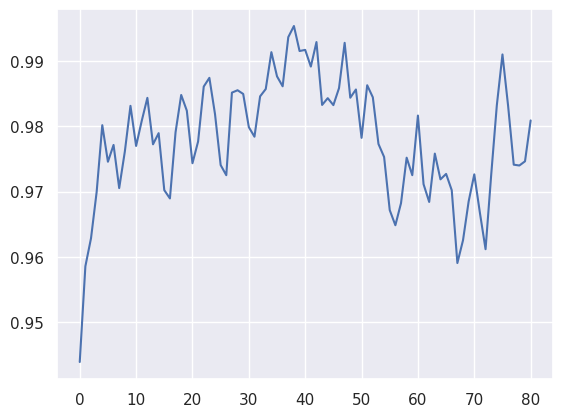

In [ ]:


window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

#Komentar o prethodnom kodu:

plt.plot(smoothed_losses[100:]): Koristi se matplotlib za iscrtavanje grafikona glačanih gubitaka.


In [ ]:
test_sentence = test_dataset[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'sr',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: ~ That is not bad at all. ~ Yeah.
Truncated input text: <sr> ~ That is not bad at all. ~ Yeah.</s><pad><pad><pad><pad><pad><pad>


In [ ]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


To uopšte nije loše.
Nije loše uopšte.
To nije loše uopšte.


In [ ]:
#@title Prevodjenje
input_text = 'Car is going fast' #@param {type:"string"}
output_language = 'sr' #@param ["en", "sr"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

NameError: name 'encode_input_str' is not defined